## DV_10



In [16]:
import requests
import pandas as pd
import geopandas as gpd
import json

In [42]:
#select the data we want as parameters, this will be done using a button
data = { "var_pollutant" :"Biossido di Azoto"} #Right now data is a dictionary

# send the request to the server, we use post because we are sending data to the server
t=requests.post(url="http://127.0.0.1:5000/api/DV_10", json=data) #json= data will convert the dictionary to a json object and send it to the server
#data = t.json()
#print(data)


try:
    data = t.json() #This will convert the response to a json object
    print("The query returned", len(data), "rows")
    print(type(data))
except requests.exceptions.JSONDecodeError:
    print("Risposta non valida JSON!")
    print("Contenuto della risposta:", t.text)
    data = None


The query returned 168 rows
<class 'list'>


In [ ]:

from shapely import wkt
# to visualize the response, we can conver the data to a pandas geodataframe
gdf = gpd.GeoDataFrame(data)
gdf['geometry'] = gdf['geometry'].apply(wkt.loads)
gdf.set_geometry('geometry', inplace=True)

gdf['month'] = pd.to_datetime(gdf['month'], errors='coerce')
gdf['month'] = gdf['month'].dt.strftime('%b %Y')

print(df['month'].dtype)

# Convertire il formato per mostrare solo mese e anno
#df['mese_anno'] = df['month'].dt.strftime('%Y-%m')

print(gdf)

object
                      geometry     month  monthly_average  \
0    POINT (10.21121 45.54265)  Jan 2025        41.800000   
1     POINT (8.84733 45.54852)  Jan 2025        31.200000   
2     POINT (8.90419 45.10277)  Dec 2024        35.652381   
3     POINT (9.48528 45.30602)  Jan 2025        52.300000   
4      POINT (9.39558 45.8502)  Dec 2024        32.322109   
..                         ...       ...              ...   
163    POINT (9.16698 45.5476)  Jan 2025        72.700000   
164   POINT (9.59202 45.51934)  Dec 2024        40.272109   
165   POINT (9.59202 45.51934)  Jan 2025        51.100000   
166   POINT (9.23611 45.53477)  Jan 2025        94.000000   
167   POINT (9.35166 45.84221)  Dec 2024        24.882313   

                             nome_stazione  quota  
0                      Brescia v.Tartaglia  151.0  
1                   Arconate v. De Gasperi  182.0  
2       Sannazzaro de' Burgondi v.Traversi   85.0  
3                           Lodi v.Vignati   80.0  


C:\Users\silvi\AppData\Local\Temp\ipykernel_3212\2296785636.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gdf['month'] = pd.to_datetime(df['month'], errors='coerce')


In [29]:
# to visualize the response, we can conver the data to a pandas dataframe
df = pd.DataFrame(data)

df['month'] = pd.to_datetime(df['month'], errors='coerce')
df['month'] = df['month'].dt.strftime('%b %Y')


print(df['month'].dtype)

# Convertire il formato per mostrare solo mese e anno
#df['mese_anno'] = df['month'].dt.strftime('%Y-%m')

print(df)

object
                                              geometry     month  \
0    0101000020E6100000FA493117236C24408E656E7C75C5...  Jan 2025   
1    0101000020E6100000E627CDCDD4B12140E46697F335C6...  Jan 2025   
2    0101000020E610000090B54CA7F1CE21403FD42AB8278D...  Dec 2024   
3    0101000020E61000008E06AEFA75F8224061529D8A2BA7...  Jan 2025   
4    0101000020E6100000545227A089CA2240A050913BD3EC...  Dec 2024   
..                                                 ...       ...   
163  0101000020E6100000D7F9B7CB7E552240A13193A817C6...  Jan 2025   
164  0101000020E61000009882FB221D2F2340F100819479C2...  Dec 2024   
165  0101000020E61000009882FB221D2F2340F100819479C2...  Jan 2025   
166  0101000020E6100000D3476448E3782240DD7EB74873C4...  Jan 2025   
167  0101000020E6100000DCC26F1A0DB422406D565CA0CDEB...  Dec 2024   

     monthly_average                          nome_stazione  quota  
0          41.800000                    Brescia v.Tartaglia  151.0  
1          31.200000                 A

In [51]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.widgets import Cursor
from matplotlib.widgets import Slider
from matplotlib.widgets import RadioButtons

In [ ]:
# Creazione del plot con contour lines
#.contour(gdf['geometry'],gdf['quota'], levels=10, cmap='viridis')  # Contour lines
#plt.colorbar(label="Quota")

#plt.show()

## DV_11

In [ ]:
# to visualize the response, we can conver the data to a pandas dataframe
df = gpd.GeoDataFrame(data)

df['month'] = pd.to_datetime(df['month'], errors='coerce')
df['month'] = df['month'].dt.strftime('%b %Y')

print(df['month'].dtype)

# Convertire il formato per mostrare solo mese e anno
#df['mese_anno'] = df['month'].dt.strftime('%Y-%m')

print(gdf)

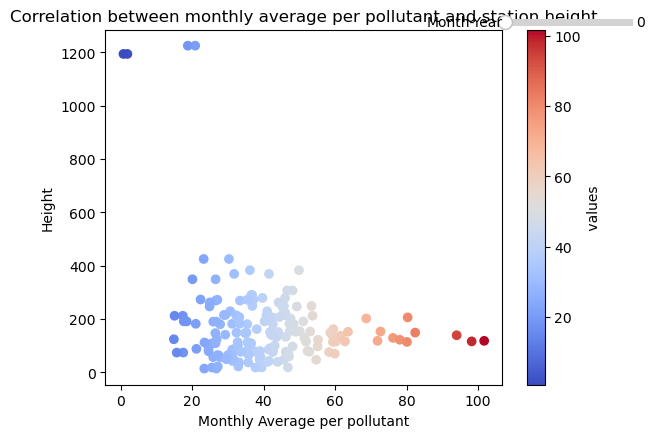

In [ ]:
#plt.plot(df['monthly_average'],df['quota'],'o')
# Creazione del plot
fig, ax = plt.subplots()
plt.subplots_adjust(top=0.85)  # Aggiunge spazio in alto 
# CAN BE ADDED A BOTTON FOR YEAR SELECTION

plt.scatter(df['monthly_average'], df['quota'], c=df['monthly_average'], cmap='coolwarm', marker='o')

# Aggiungere una barra dei colori
plt.colorbar(label=" values ")

# Labels and title
plt.title("Correlation between monthly average per pollutant and station height")
plt.xlabel("Monthly Average per pollutant")
plt.ylabel("Height")

#* Lista dei mesi
mesi = df['month']
mesi_dict = {i: mesi[i] for i in range(len(mesi))}  # Mappa numeri → mesi

# Slider con valori discreti
ax_slider = plt.axes([0.75, 0.85, 0.2, 0.03])
slider = Slider(ax_slider, 'Month-Year', 0, len(mesi)-1, valstep=1)

# Funzione di aggiornamento
def update(val):
    selected_month = mesi_dict[int(val)]
    print(f"Mese selezionato: {selected_month}")
    # Aggiorna il valore del grafico
    fig.canvas.draw_idle()  # Rende il widget interattivo
slider.on_changed(update)


plt.show()